<a href="https://colab.research.google.com/github/Elman295/NEW_APPROACH_IN_IMAGE_CLASSIFICATION/blob/main/NEW_APPROACH_IN_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Abstract***

---


In this project, I aim to utilize a new approach in image classification. We used to implement *FC* (Fully Connected) layer model or *CNN* (Convolutional Neural Network) for image classification tasks. However, in this research, I want to test a new method which uses histogram images as its input instead of real pictures. End of this article, we can easily test our new models and describe the pros and cons of that.
*keywords: Image classification, CNN, FC models and Histogram*

**Introduction**

---


Computer Vision (CV) is concerned with the understanding of a single or sequence of images. Many models like CNN are implemented for many vision tasks like image classification, segmentation, recognition and GAN algorithms (DCGAN). Moreover, in this article, we test our new approach to the MNIST(Modified National Institute of Standards and Technology) dataset.



*   MNIST databaes <br>
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

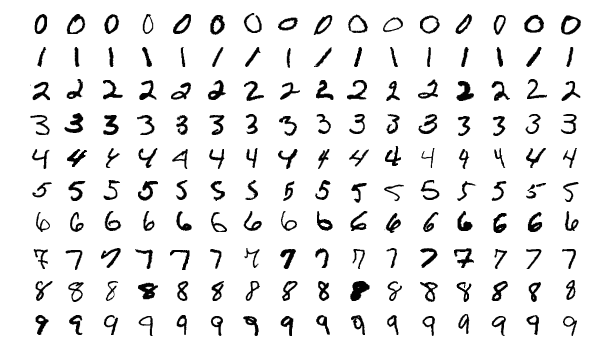








**Methodology**

---


In this new approach, we use a simple CNN or Dense model for classifying our histogram dataset which is produced by the main dataset. 



*   *The* architecture of our proposed model: <br>
Firstly, we convert our dataset to the desired histogram and create a new dataset which consists of histograms and labels as its inputs and outputs respectively. After that, we use simple Dense models or CNN models to train and evaluate our models.




In [1]:
import tensorflow as tf
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
data = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"sahpe of x_train: {x_train.shape}")
print(f"sahpe of y_train: {y_train.shape}")
print(f"sahpe of x_test: {x_test.shape}")
print(f"sahpe of y_test: {y_test.shape}")

sahpe of x_train: (60000, 28, 28)
sahpe of y_train: (60000,)
sahpe of x_test: (10000, 28, 28)
sahpe of y_test: (10000,)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

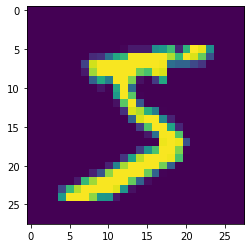

In [5]:
plt.imshow(x_train[0]) 
plt.show()

In [6]:
x_train[0].reshape(28*28) # flatten

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

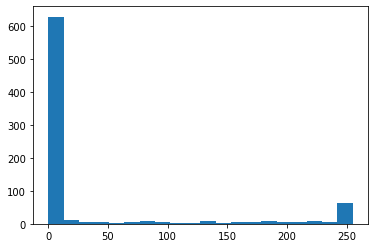

In [7]:
plt.hist(x_train[0].reshape(28*28),bins = 20)
plt.show()

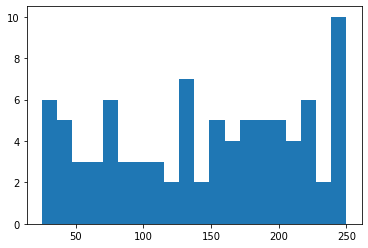

In [8]:
plt.hist(x_train[0].reshape(28*28),bins = 20, range = (25,250))
plt.show()

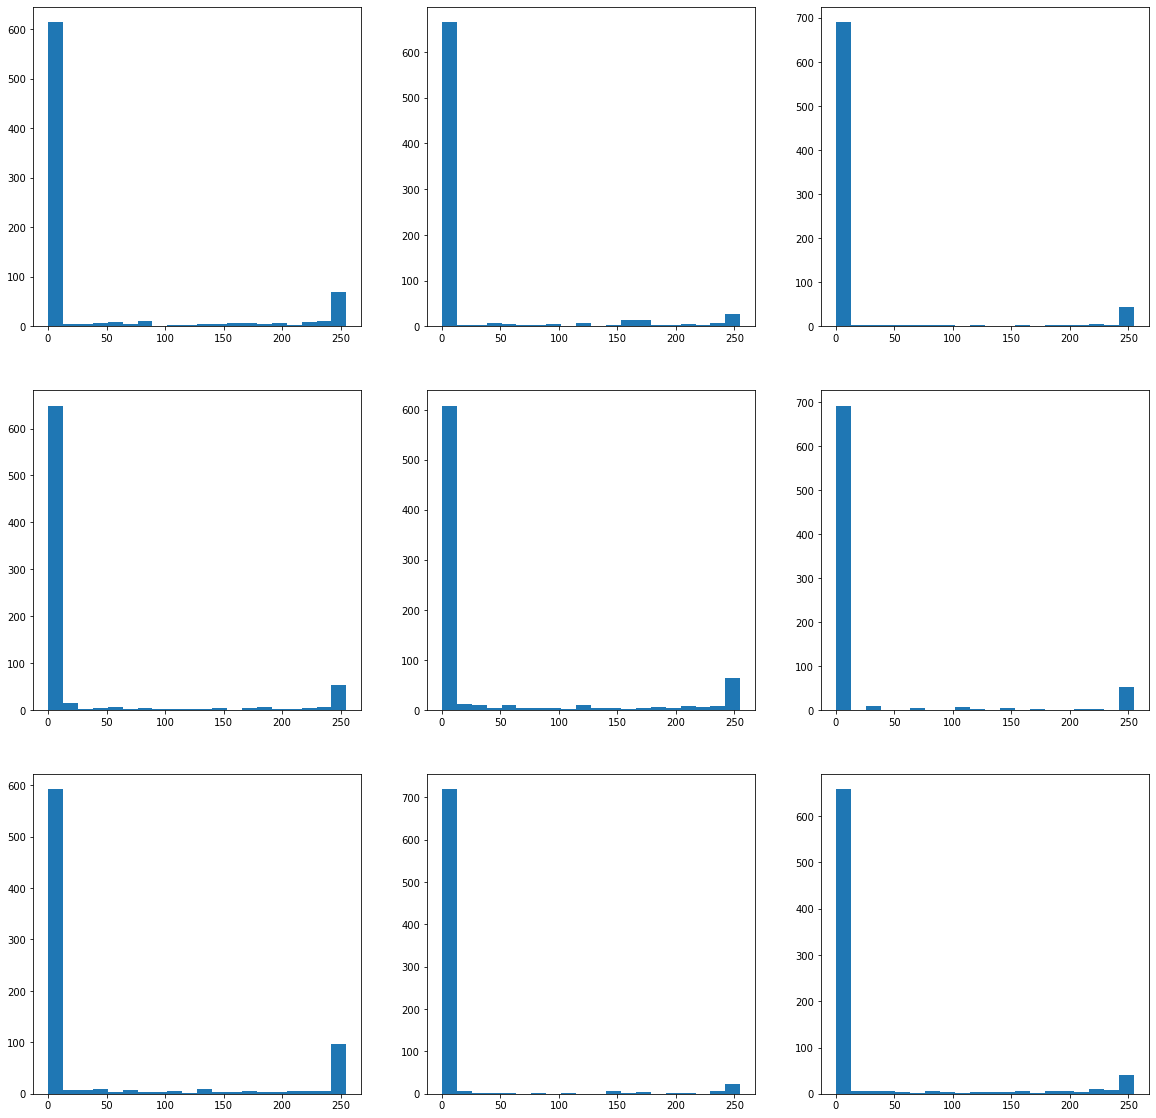

In [9]:
plt.figure(figsize=(20,20)) 

for i in range(1,10):
  plt.subplot(3,3,i) 
  plt.hist(x_train[i].reshape(28*28),bins = 20)

plt.show()

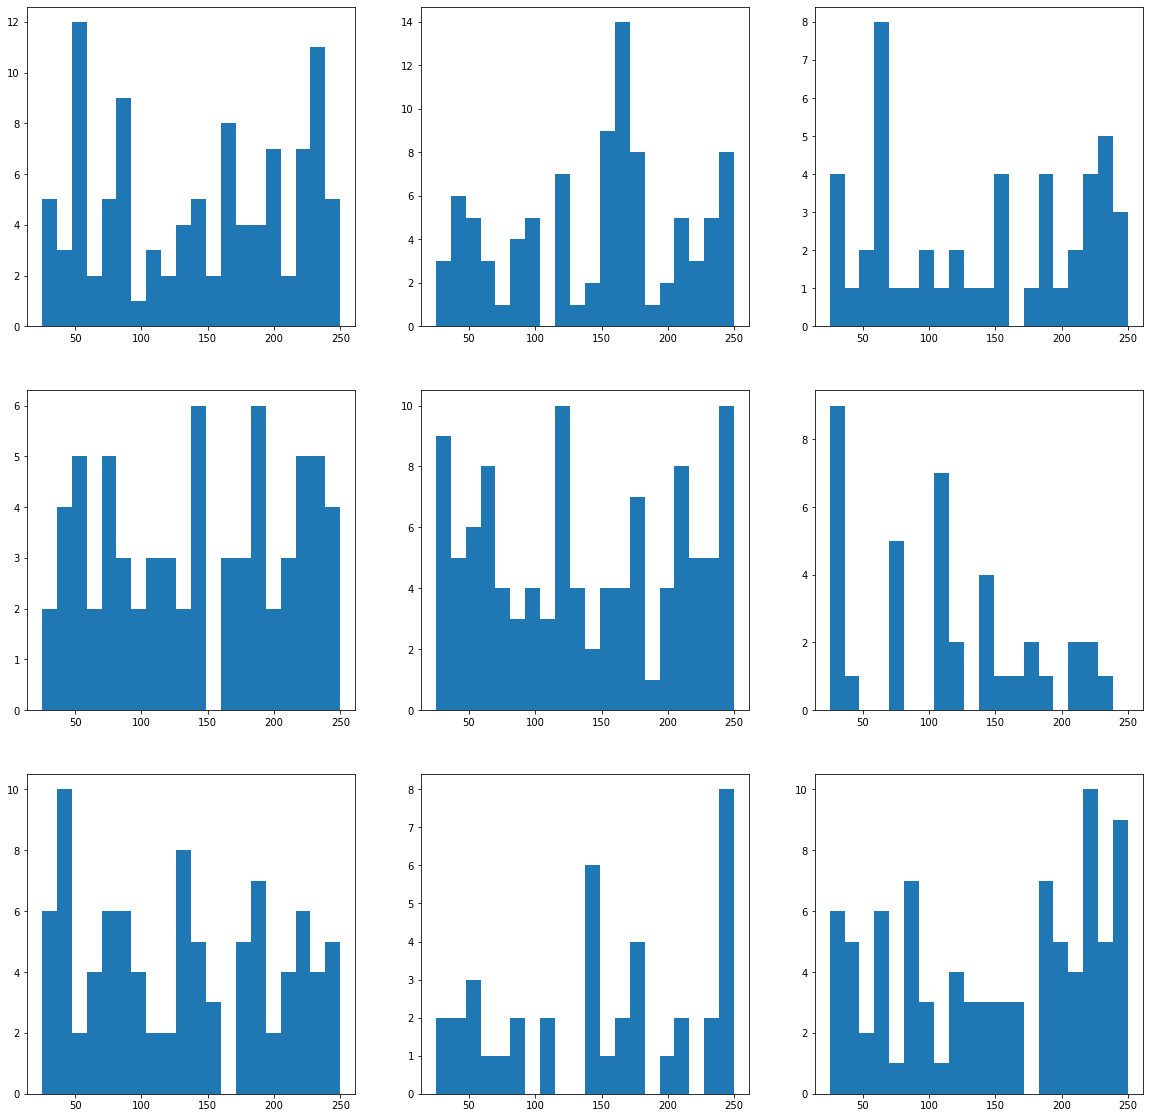

In [10]:
plt.figure(figsize=(20,20)) 

for i in range(1,10):
  plt.subplot(3,3,i) 
  plt.hist(x_train[i].reshape(28*28),bins = 20, range = (25,250))

plt.show()

In [14]:
def make_hist_ds(image_ds,target_ds):

  for i in range(5000):

    if target_ds[i] == 0:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/0/image{i}.png",) 
      plt.close()

    if target_ds[i] == 1:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/1/image{i}.png",) 
      plt.close()

    if target_ds[i] == 2:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/2/image{i}.png",) 
      plt.close()

    if target_ds[i] == 3:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/3/image{i}.png",) 
      plt.close()

    if target_ds[i] == 4:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/4/image{i}.png",) 
      plt.close()

    if target_ds[i] == 5:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/5/image{i}.png",) 
      plt.close()

    if target_ds[i] == 6:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/6/image{i}.png",) 
      plt.close()


    if target_ds[i] == 7:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/7/image{i}.png",) 
      plt.close()

    if target_ds[i] == 8:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/8/image{i}.png",) 
      plt.close()

    if target_ds[i] == 0:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/0/image{i}.png",) 
      plt.close()

    if target_ds[i] == 9:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/9/image{i}.png",) 
      plt.close()

In [15]:
image_to_hist = make_hist_ds(x_train,y_train)

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "training_folder",
    image_size = (120,120),
    shuffle = True
)

Found 5000 files belonging to 11 classes.


In [17]:
train_ds.class_names

['.ipynb_checkpoints', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


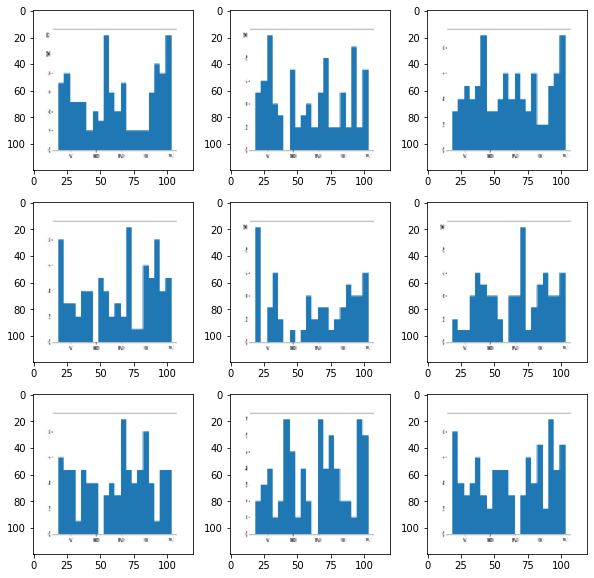

In [18]:
plt.figure(figsize=(10,10))
for img,label in train_ds.take(1):
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(img[i].numpy().astype("uint8"), cmap = "gray")
    print(label[i])

plt.show()

In [22]:
def make_hist_ds_test(image_ds,target_ds):

  for i in range(1000):

    if target_ds[i] == 0:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/0/image{i}.png",) 
      plt.close()

    if target_ds[i] == 1:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/1/image{i}.png",) 
      plt.close()

    if target_ds[i] == 2:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/2/image{i}.png",) 
      plt.close()

    if target_ds[i] == 3:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/3/image{i}.png",) 
      plt.close()

    if target_ds[i] == 4:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/4/image{i}.png",) 
      plt.close()

    if target_ds[i] == 5:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"training_folder/5/image{i}.png",) 
      plt.close()

    if target_ds[i] == 6:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/6/image{i}.png",) 
      plt.close()


    if target_ds[i] == 7:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/7/image{i}.png",) 
      plt.close()

    if target_ds[i] == 8:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/8/image{i}.png",) 
      plt.close()

    if target_ds[i] == 0:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/0/image{i}.png",) 
      plt.close()

    if target_ds[i] == 9:
      x = plt.hist(image_ds[i].reshape(28*28),bins = 20,range = (25,250))
      plt.savefig(fname = f"test_folder/9/image{i}.png",) 
      plt.close()

In [23]:
image_to_hist_test = make_hist_ds_test(x_test,y_test)

In [24]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "test_folder",
    shuffle = True,
    image_size = (120,120)
)

Found 913 files belonging to 11 classes.


tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


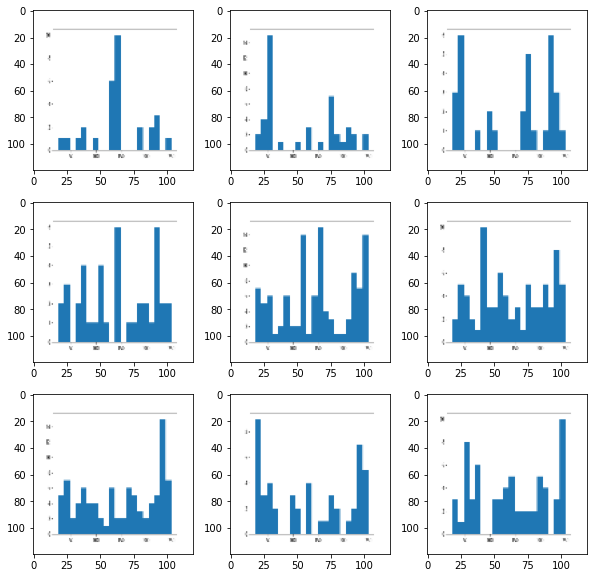

In [25]:
plt.figure(figsize=(10,10))
for img,label in test_ds.take(1):
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(img[i].numpy().astype("uint8"), cmap = "gray")
    print(label[i])

plt.show()

In [42]:
class CNN_Model(tf.keras.models.Model):

  def __init__(self):
    super(CNN_Model,self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32,(3,3),activation = "relu", input_shape = (120,120,1)) 
    self.conv2 = tf.keras.layers.Conv2D(64,(3,3),activation = "relu") 
    self.conv3 = tf.keras.layers.Conv2D(64,(3,3),activation = "relu") 
    self.conv4 = tf.keras.layers.Conv2D(128,(3,3),activation = "relu")
    self.flatten = tf.keras.layers.Flatten() 
    self.d1 = tf.keras.layers.Dense(units = 128, activation = "relu") 
    self.d2 = tf.keras.layers.Dense(units = 11, activation = "softmax")
    self.pool = tf.keras.layers.MaxPool2D()

  def call(self,x):
    x = self.conv1(x)
    x = self.conv2(x) 
    x = self.pool(x) 
    x = self.conv3(x) 
    x = self.conv4(x) 
    x = self.pool(x) 
    x = self.flatten(x) 
    x = self.d1(x) 
    res = self.d2(x) 
    return res 


In [43]:
model = CNN_Model() 

for img,_ in train_ds.take(1):
  for i in range(10):
    prediction = model(img[i].numpy().reshape(1,120,120,3))
    print(prediction)

tf.Tensor(
[[3.1697128e-10 4.6083298e-01 2.5591635e-06 6.3601689e-12 1.3490413e-04
  4.0065036e-03 3.7713900e-01 4.0461047e-05 1.5784176e-01 1.7747750e-06
  8.2010693e-08]], shape=(1, 11), dtype=float32)
tf.Tensor(
[[3.8534650e-10 4.8191462e-02 6.5184665e-08 5.6280474e-14 1.7949744e-05
  8.0978815e-03 7.0367160e-04 1.6351821e-06 9.4298714e-01 1.8964836e-07
  1.8623100e-09]], shape=(1, 11), dtype=float32)
tf.Tensor(
[[3.5507566e-11 4.5254090e-01 2.8434567e-07 1.9296862e-13 1.1427820e-04
  1.6932100e-01 1.6927192e-01 6.3546957e-04 2.0811433e-01 1.6422589e-06
  1.2449800e-07]], shape=(1, 11), dtype=float32)
tf.Tensor(
[[6.6112445e-12 3.7660855e-05 1.1532195e-09 2.4940262e-14 1.4475329e-08
  6.5576464e-02 1.0313039e-03 6.8936728e-08 9.3335432e-01 1.0505723e-07
  7.3610729e-11]], shape=(1, 11), dtype=float32)
tf.Tensor(
[[1.7702509e-10 6.1531967e-01 2.6244593e-09 1.2295308e-14 2.7303393e-05
  7.9568230e-02 2.3791550e-02 2.9490868e-06 2.8129023e-01 5.2167561e-08
  1.0708886e-11]], shape=(1, 

In [44]:
model.summary()

Model: "cnn__model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          multiple                  896       
                                                                 
 conv2d_17 (Conv2D)          multiple                  18496     
                                                                 
 conv2d_18 (Conv2D)          multiple                  36928     
                                                                 
 conv2d_19 (Conv2D)          multiple                  73856     
                                                                 
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_8 (Dense)             multiple                  11944064  
                                                                 
 dense_9 (Dense)             multiple                 

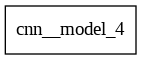

In [45]:
tf.keras.utils.plot_model(model, show_shapes = True, show_dtype=True) #funny

In [46]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optimizer_fn = tf.keras.optimizers.Adam()

In [63]:
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = "training_accuracy")
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name = "test_accuracy")

train_loss = tf.keras.metrics.Mean(name = "train_loss")
test_loss = tf.keras.metrics.Mean(name = "test_loss")



In [64]:
@tf.function 
def train_step(image,label):

  with tf.GradientTape() as tape:

    prediction = model(image, training = True) 
    loss = loss_fn(label,prediction) 
    gradient = tape.gradient(target = loss,sources = model.trainable_variables) 
    optimizer_fn.apply_gradients(zip(gradient,model.trainable_variables))


  train_accuracy(label,prediction) 
  train_loss(loss) 

In [65]:
@tf.function
def test_step(image, label): 
  prediction = model(image, training = False) 
  loss = loss_fn(label, prediction) 


  test_accuracy(label,prediction) 
  test_loss(loss)

In [66]:
EPOCHS = 30 

TrainAccuracy = [] 
TrainLoss = [] 
TestAccuracy = [] 
TestLoss = []

for epoch in range(EPOCHS):

  train_accuracy.reset_states()
  test_accuracy.reset_states() 
  train_loss.reset_states()
  test_loss.reset_states()

  for img,label in train_ds:
    train_step(img,label) 

  for img,label in test_ds:
    test_step(img,label) 


  TrainAccuracy.append(train_accuracy.result()) 
  TrainLoss.append(train_loss.result())
  TestAccuracy.append(test_accuracy.result())
  TestLoss.append(test_loss.result())


  print(f"epoch : {epoch+1}")
  print(f"training_accuracy : {train_accuracy.result()}")
  print(f"training_loss : {train_loss.result()}")
  print(f"test_accuracy : {test_accuracy.result()}")
  print(f"test_loss : {test_loss.result()}")




/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


epoch : 1
training_accuracy : 0.04639999940991402
training_loss : 2.3015947341918945
test_accuracy : 0.10514786094427109
test_loss : 2.2876079082489014
epoch : 2
training_accuracy : 0.0575999990105629
training_loss : 2.3009824752807617
test_accuracy : 0.07009857892990112
test_loss : 2.2869672775268555
epoch : 3
training_accuracy : 0.04479999840259552
training_loss : 2.301264762878418
test_accuracy : 0.03504928946495056
test_loss : 2.2863519191741943
epoch : 4
training_accuracy : 0.08320000022649765
training_loss : 2.3013174533843994
test_accuracy : 0.03504928946495056
test_loss : 2.287990093231201
epoch : 5
training_accuracy : 0.06400000303983688
training_loss : 2.301492214202881
test_accuracy : 0.14019715785980225
test_loss : 2.288022518157959
epoch : 6
training_accuracy : 0.07680000364780426
training_loss : 2.301222085952759
test_accuracy : 0.03504928946495056
test_loss : 2.2885963916778564
epoch : 7
training_accuracy : 0.08959999680519104
training_loss : 2.3013992309570312
test_accu

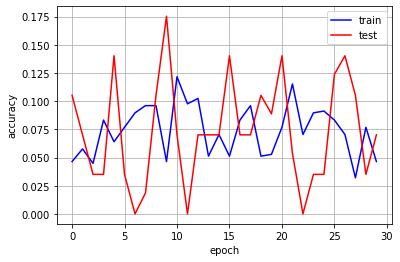

In [69]:
plt.plot(TrainAccuracy, color = "blue", label = "train") 
plt.plot(TestAccuracy, color = "red", label = "test")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

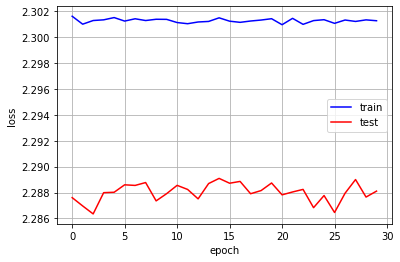

In [71]:
plt.plot(TrainLoss, color = "blue", label = "train") 
plt.plot(TestLoss, color = "red", label = "test")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

**Result**

---

In conclusion, it is a bad idea because train and test accuracy are so low and fluctuate widely. Moreover, the loss is so high that we cannot use our new approach in high-level projects.

If you have a better idea you can contact me via elmangazayi@gmail.com
